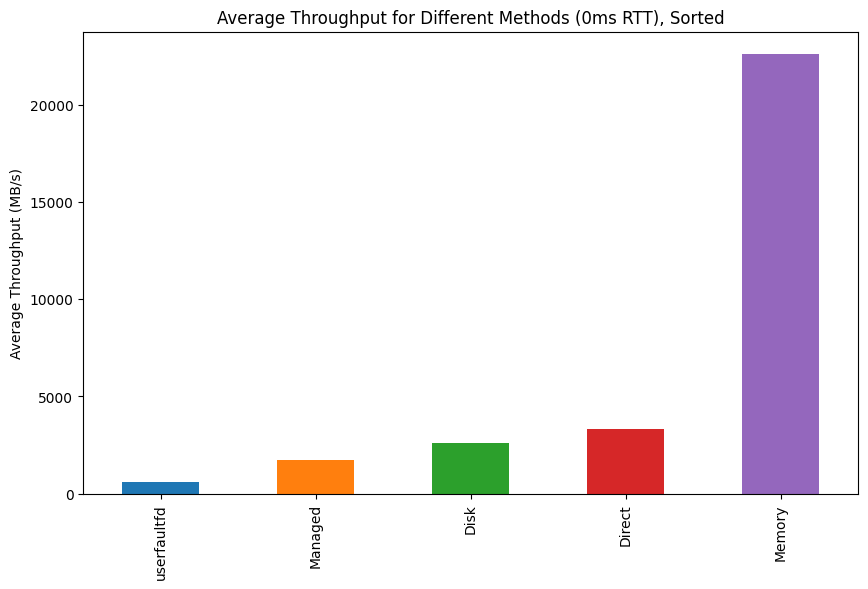

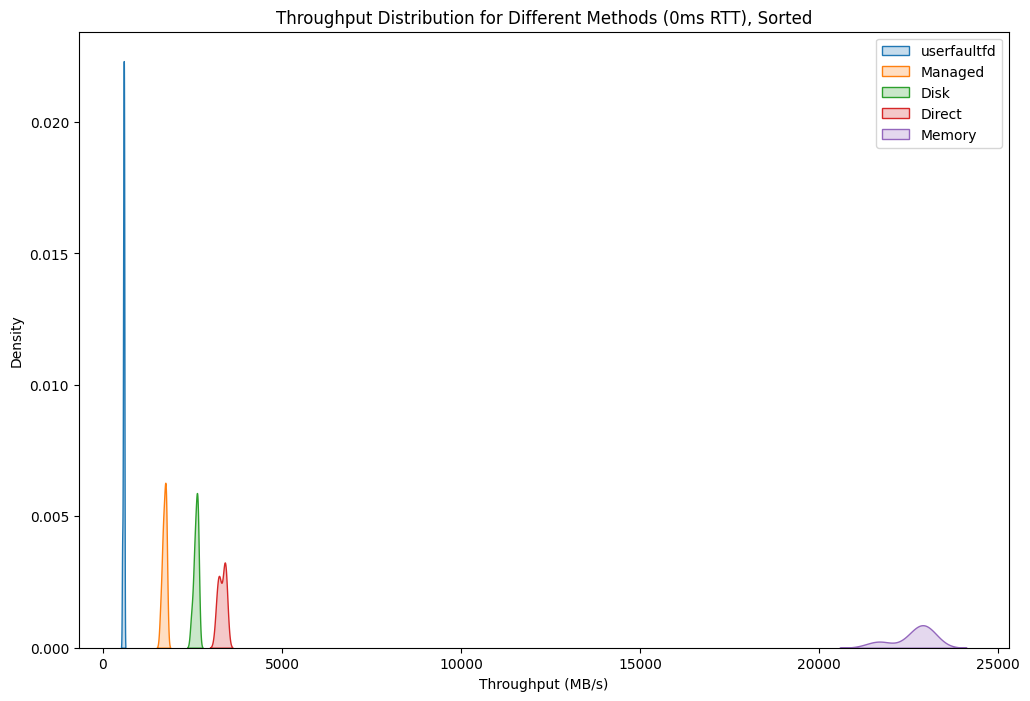

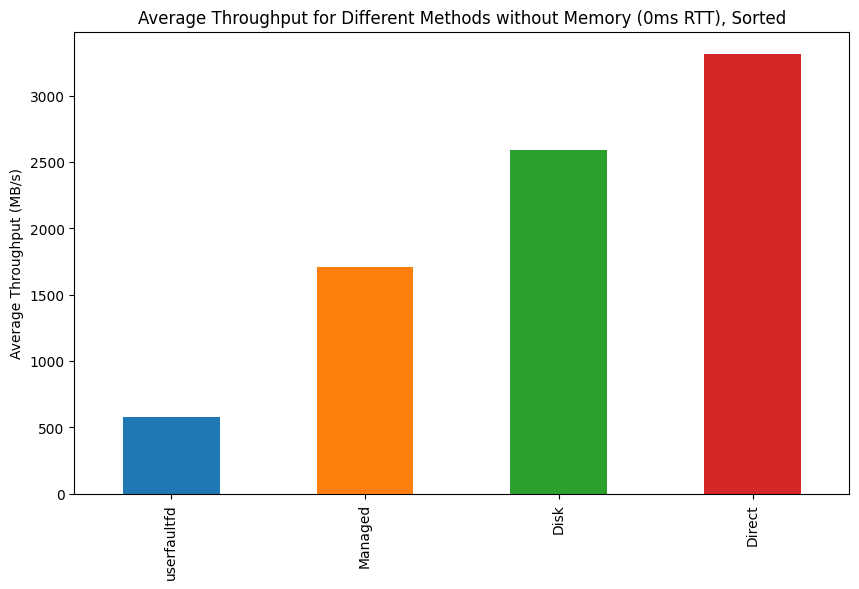

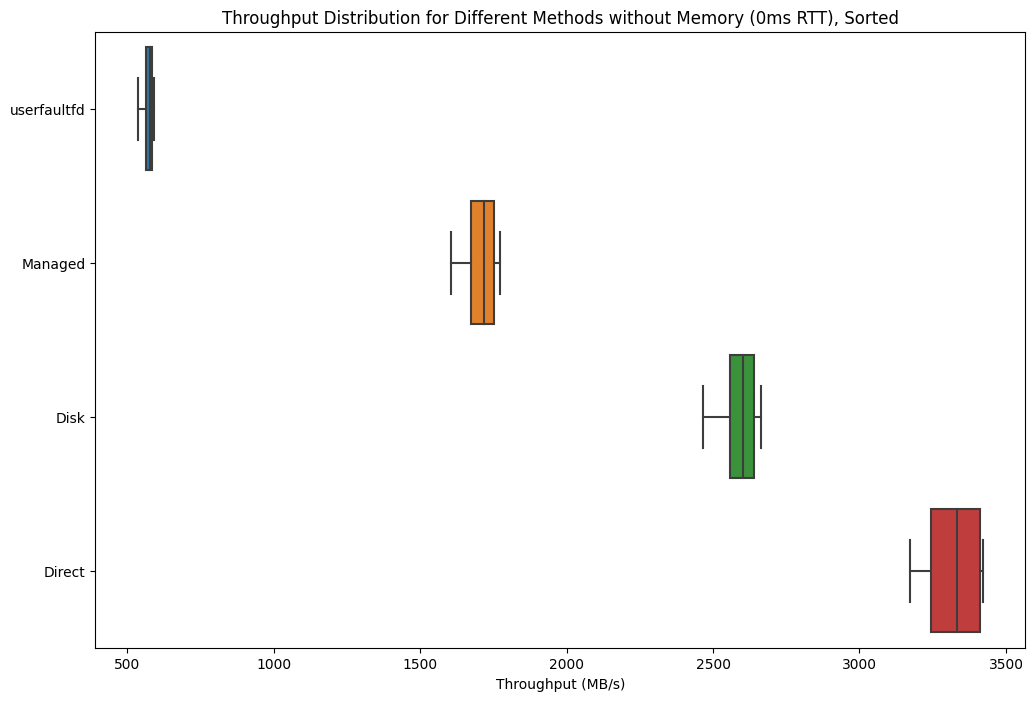

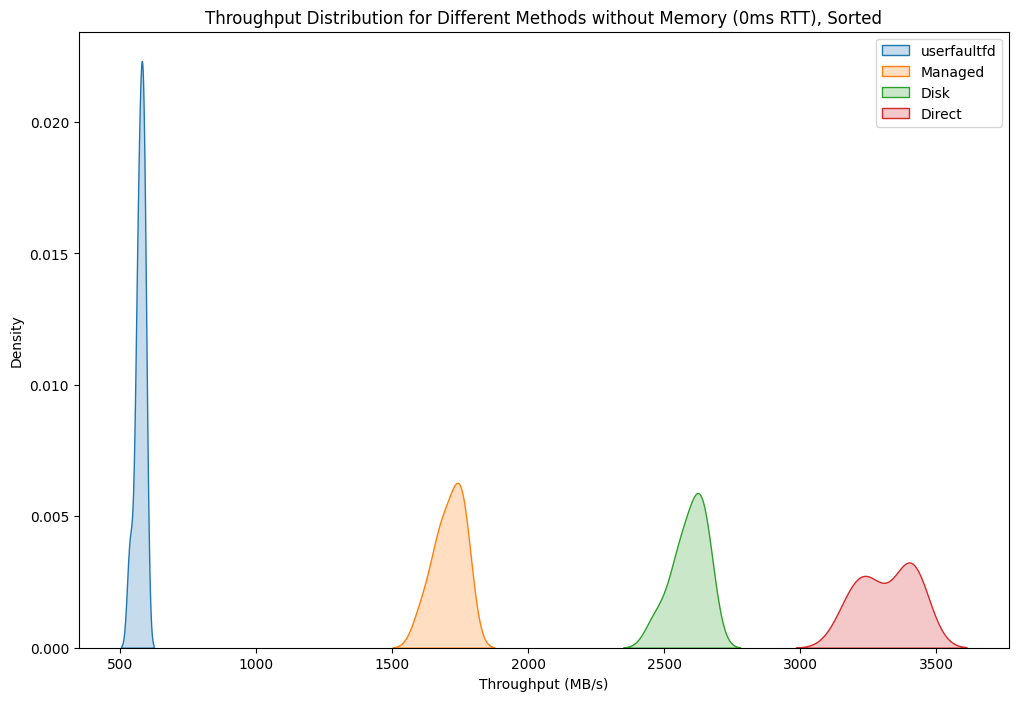

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('../bench/throughput-rtt0/results.csv')

# Rename the columns to only include the technology name
cleaned_df = df.rename(columns=lambda s: s.split(' ')[2])

# Calculate the averages and sort them from lowest to highest for the cleaned DataFrame
sorted_cleaned_averages = cleaned_df.mean().sort_values()

# Sort the columns in the cleaned DataFrame based on the sorted averages
sorted_cleaned_df = cleaned_df[sorted_cleaned_averages.index]

# Set a different color palette
sns.set_palette('tab10', len(cleaned_df.columns))

# Plot the sorted averages in a bar chart
plt.figure(figsize=(10, 6))
sorted_cleaned_averages.plot(kind='bar', color=sns.color_palette())
plt.ylabel('Average Throughput (MB/s)')
plt.title('Average Throughput for Different Methods (0ms RTT), Sorted')
plt.show()

# Plot overlapping KDEs for the sorted throughput distribution
plt.figure(figsize=(12, 8))
for col in sorted_cleaned_df.columns:
    sns.kdeplot(sorted_cleaned_df[col], label=col, fill=True)

plt.xlabel('Throughput (MB/s)')
plt.ylabel('Density')
plt.title('Throughput Distribution for Different Methods (0ms RTT), Sorted')
plt.legend()
plt.show()

# Remove the "Memory" column from the DataFrame
df_no_memory = cleaned_df.drop(columns='Memory')

# Calculate the averages and sort them from lowest to highest
sorted_averages = df_no_memory.mean().sort_values()

# Sort the columns in the DataFrame based on the sorted averages
sorted_df_no_memory = df_no_memory[sorted_averages.index]

# Set the color palette for the DataFrame without "Memory"
sns.set_palette('tab10', len(df_no_memory.columns))

# Plot the sorted averages in a bar chart for the DataFrame without "Memory"
plt.figure(figsize=(10, 6))
sorted_averages.plot(kind='bar', color=sns.color_palette())
plt.ylabel('Average Throughput (MB/s)')
plt.title('Average Throughput for Different Methods without Memory (0ms RTT), Sorted')
plt.show()

# Create a boxplot for the sorted throughput distribution
plt.figure(figsize=(12, 8))
sns.boxplot(data=sorted_df_no_memory, orient='h', palette=sns.color_palette())
plt.xlabel('Throughput (MB/s)')
plt.title('Throughput Distribution for Different Methods without Memory (0ms RTT), Sorted')
plt.show()

# Plot overlapping KDEs for the sorted throughput distribution
plt.figure(figsize=(12, 8))
for col in sorted_df_no_memory.columns:
    sns.kdeplot(sorted_df_no_memory[col], label=col, fill=True)

plt.xlabel('Throughput (MB/s)')
plt.ylabel('Density')
plt.title('Throughput Distribution for Different Methods without Memory (0ms RTT), Sorted')
plt.legend()
plt.show()